In [1]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading the dataset into pandas and viewing the first few rows.
crimes = pd.read_csv("crimes.csv")
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [3]:
# Checking the information of the dataset.
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


In [4]:
# To get only the hours from the time column, we need to convert to strings first,
# get the first two figures and then convert back to integer.
crimes["HOUR OCC"] = crimes["TIME OCC"].astype(str).str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV,11
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST,16
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT,12
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV,63
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST,90


In [5]:
# To determine the hour of day with the highest crime
hr_of_day_with_highest_crime = crimes["HOUR OCC"].value_counts()
hr_of_day_with_highest_crime

12    14219
20    11824
10    11310
15    10198
18    10144
      ...  
39       12
59       11
29       10
57       10
56        9
Name: HOUR OCC, Length: 83, dtype: int64

In [7]:
# To know the crimes that occured during the night
night_crime = crimes[crimes["HOUR OCC"].isin([22, 23, 0, 1, 2, 3])]
night_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
8,231207476,2023-02-27,2020-08-15,1,77th Street,BURGLARY,72,M,B,NaN,Invest Cont,8800 HAAS AV,1
30,221314362,2022-07-11,2020-04-07,1,Newton,THEFT OF IDENTITY,53,F,H,NaN,Invest Cont,1600 E OLYMPIC BL,1
33,231307252,2023-03-03,2020-07-05,2305,Newton,THEFT OF IDENTITY,22,F,B,NaN,Invest Cont,6600 S BROADWAY,23
36,221614254,2022-11-13,2020-01-01,1,Foothill,THEFT OF IDENTITY,22,F,H,NaN,Invest Cont,10200 TELFAIR AV,1
39,220710510,2022-06-16,2020-07-01,1,Wilshire,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",19,X,X,NaN,Invest Cont,6100 WILSHIRE BL,1


In [12]:
# To know the area with the highest night crimes and also the time the crimes are comitted
night_crime.groupby("HOUR OCC")["AREA NAME"].value_counts().sort_values(ascending = False)

HOUR OCC  AREA NAME
23        Central      800
22        Central      794
23        Hollywood    625
22        Southwest    580
          Hollywood    569
                      ... 
3         Topanga        1
          Olympic        1
          Mission        1
          Foothill       1
          Wilshire       1
Name: AREA NAME, Length: 102, dtype: int64

In [15]:
# To know the number of crimes by area
crimes_by_area = crimes.groupby("AREA NAME")["HOUR OCC"].count().sort_values(ascending = False)
crimes_by_area

AREA NAME
Central        14944
Southwest      11945
77th Street    11739
Pacific         9923
Hollywood       9762
Southeast       9571
Olympic         9414
Newton          9152
Van Nuys        8621
N Hollywood     8502
Wilshire        8482
Topanga         8478
Rampart         8346
West Valley     8102
West LA         7911
Northeast       7628
Devonshire      7411
Mission         6990
Harbor          6618
Hollenbeck      6193
Foothill        5983
Name: HOUR OCC, dtype: int64

In [16]:
# To know the location with the peak night crime rate 
peak_night_crime_location = crimes_by_area.index[0]
peak_night_crime_location

'Central'

In [17]:
# Grouping the victims ages and analyzing their frequency of occurence
Age_bins = [0,17, 25,34,44,54,64, np.inf]
bins= ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes['Victim Age Group'] = pd.cut(crimes['Vict Age'], bins=Age_bins, labels=bins)
victim_ages = crimes["Victim Age Group"].value_counts()
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Victim Age Group, dtype: int64

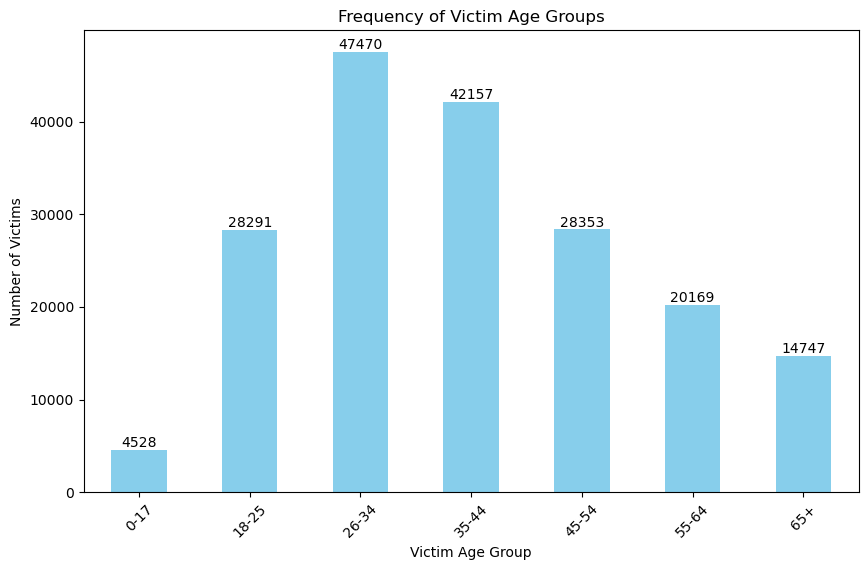

In [21]:
# Bar chart for frequency of victim age groups with labels
plt.figure(figsize=(10, 6))
ax = victim_ages.sort_index().plot(kind='bar', color='skyblue')
plt.title('Frequency of Victim Age Groups')
plt.xlabel('Victim Age Group')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)

# Adding labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()